## Neural Networks

#### *06 November 2019*
#### *DATA 1010*

In [1]:
using LinearAlgebra, StatsBase, Statistics, Roots, Optim, Distributions, Plots, Random
mycgrad = cgrad([:MidnightBlue, :LightSeaGreen, :Yellow, :Tomato])
gr(fontfamily = "Palatino", fillcolor = mycgrad, linecolor = mycgrad)
Random.seed!(1234);

**Introduction**

The **multilayer perceptron** is the plain vanilla **neural network**. Machine learning with neural networks also goes under the brand **deep learning**. The *deep* in *deep learning* refers to the fact that neural networks process data through a sequence of **layers**, each of which is designed to yield a representation of the data which is useful to the next layer. 

For example, consider the following spiral dataset (which represents a classification problem with a two-dimensional feature space).

<img src="spiral.svg" width="250px">

Suppose we want to separate the red and blue classes with a plane. We can't do it in the given feature space, but we can first map the data to a higher dimensional feature space where they are linearly separable.

## Problem 1 

What technique have we already learned which would enable us to linearly separate the classes?

*Solution*. Kernelized support vector machines.

With a neural network, we can do this separation in a different way. In fact, we can map the original data to just a *three*-dimensional feature space where they separate. One nice thing about that is that we can visualize where the points go in this intermediate space:

<img src="feature-map.png" width="250px">

From there, we can map the points to the the number line: 

<img src="number-line.svg">

To visualize this process a little more clearly, we can paint half the number line red and half blue, and then pull back those colors into the preceding spaces: 

<center>
<img src="spiral.png" width="220px" style="vertical-align: middle;">
<img src="nn-image-surface.png" width="220px" style="vertical-align: middle;">
<img src="number-line.svg" width="220px" style="vertical-align: middle;">
</center>

The key distinction between support vector machines and neural networks is that the feature map is not specified implicitly by the kernel, it is **learnable** from the data. It's like we're saying to the model, *we don't know how best to transform the feature data; you do it*. 

This turns out to be such a powerful idea that we can build the individual layers in a very simple way. The simplest idea (arguably) would be to make each transformation linear. However, that doesn't work because then the whole composition would be linear, and we wouldn't be gaining any expressivity from the additional layers. So between each pair of linear transformations, we apply a fixed nonlinear function componentwise. For example, we might use the sigmoid function $x\mapsto 1/(1+\exp(-x))$. This nonlinear function is called the **activation**. 

Before diving into the details, let's briefly take a look at how to build and train a network using a deep learning package. Note that `Dense` is the name for a linear transformation together with its activation (if specified), while `Chain` composes dense layers. 

In [2]:
include("neural-net.jl")
X # features

2×1000 Array{Float64,2}:
 -0.0893346  -0.200178   0.0346879  …  -0.514862  -0.641594  -0.896516
  0.177033    0.319222  -0.245505       0.42011    0.712824  -0.173319

In [3]:
Y # response values

2×1000 Flux.OneHotMatrix{Array{Flux.OneHotVector,1}}:
 0  0  0  0  1  0  1  1  0  0  1  1  1  …  1  0  0  1  1  0  0  1  0  0  1  1
 1  1  1  1  0  1  0  0  1  1  0  0  0     0  1  1  0  0  1  1  0  1  1  0  0

Let's build the model and define our loss function: 

In [4]:
model = Chain(Dense(2, 3, sigmoid), Dense(3, 2), softmax) 
loss(model, x, y) = crossentropy(model(x), y)

loss (generic function with 1 method)

Next, we can train the model:

In [5]:
dataset = repeated((X,Y), 60_000)
opt = ADAM() # Adam is a gradient descent algorithm commonly used to train neural networks
Flux.train!((x,y) -> loss(model, x, y), params(model), dataset, opt)

Finally, we can visualize the results:

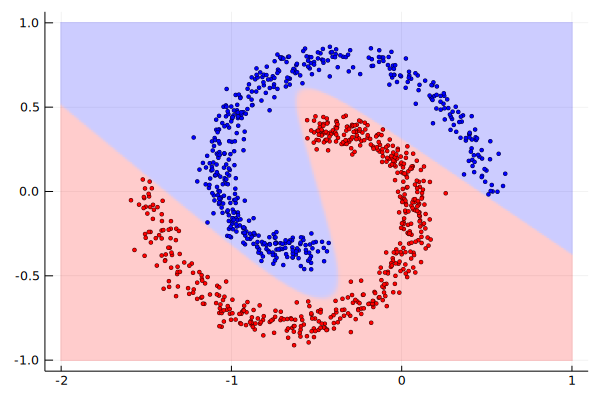

In [6]:
scatter(X[1,:]', X[2,:]', marker_z = Y[1,:]', color = cgrad([:red, :blue]), 
        label = "", ms = 2, msw = 0.5)
heatmap!(-2:0.01:1, -1:0.01:1, (x,y) -> Tracker.data(model([x,y])),
         fillcolor = cgrad([:red, :blue]), colorbar = :false, fillopacity = 0.2)

We can see what each layer's output looks like: 

In [7]:
# first layer:
model.layers[1]([0.0, 0.0])

Tracked 3-element Array{Float32,1}:
 0.84808886f0 
 0.9999672f0  
 0.025637811f0

In [8]:
# first two layers:
Chain(model.layers[1:2]...)([0.0, 0.0])

Tracked 2-element Array{Float32,1}:
 -18.355663f0
  19.306469f0

In [9]:
# all three layers: 
Chain(model.layers[1:3]...)([0.0, 0.0])

Tracked 2-element Array{Float32,1}:
 4.400923f-17
 1.0f0       

---

## Problem 2

Suppose that $A_1(\mathbf{x}) = \left[\begin{smallmatrix} 3 & -2 \\ 1 & 4 \end{smallmatrix}\right]\mathbf{x} + \left[\begin{smallmatrix} 1 \\ 1 \end{smallmatrix}\right]$ and $A_2(\mathbf{x}) = \left[\begin{smallmatrix} -4 & 0 \\ 3 & 1 \end{smallmatrix}\right]\mathbf{x} + \left[\begin{smallmatrix} -2 \\ 2 \end{smallmatrix}\right]$. Find $(A_2 \circ K. \circ A_1)\left(\left[\begin{smallmatrix} -2 \\ -4 \end{smallmatrix}\right]\right)$, where $K$ is the ReLU activation function $x\mapsto \max(0, x)$. 

*Solution*. 

---

## Problem 3

Let $W_1$  be a $2 \times 2$ matrix and $W_2$ a $1 \times 2$ matrix. 

Let $\mathbf{b}_1$ be a vector in $\mathbb{R}^2$. Let $b_2$ be a scalar. Define $f: \mathbb{R}^2 \to \mathbb{R}$ to be

$$f(\mathbf{x}) = W_2 \operatorname{max.}(0, W_1 \mathbf{x} + \mathbf{b}_1) + b_2,$$ 

where $\text{max}.$ indicates element-wise maximum.

(a) Draw $f$ as a neural network with nodes depicting neurons and edges for connections between neurons.

(b) Re-draw the neural network using the same format as Data Gymnasia (matrix notation). 

---

## Problem 4

Now consider the weights:

$$A_1 = \begin{bmatrix} 1 & -1 \\ -1 &  1 \end{bmatrix} \quad \text{ and } \quad 
  A_2 = \begin{bmatrix} 1 & -1 \end{bmatrix}.$$

and biases $\mathbf{b}_1 = [1, 1]$, and $b_2 = 0$. Indicate them in the first graph you drew for the previous problem.

(a) Suppose $\mathbf{x}_0 = [1, 1]$. Use Julia to compute the output of the neural network for this input value. 

*Solution*. 

(b) Use the code below to draw a heatmap of $(x,y) \mapsto x + y^2$. Try to find a set of parameters that allows the graph of the neural network to be close to the graph of $(x,y) \mapsto x + y^2$.

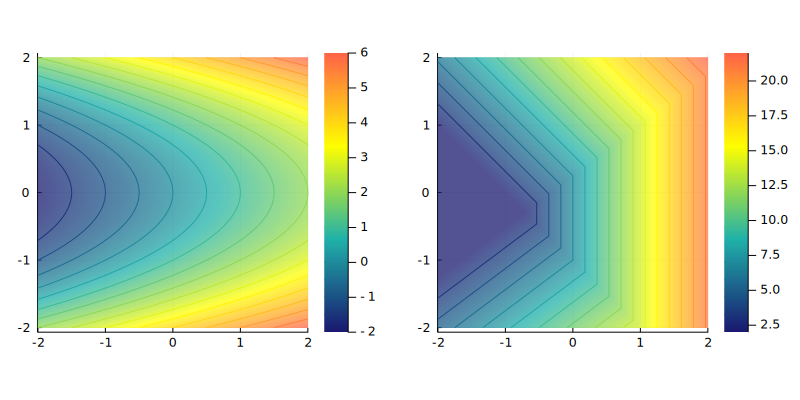

In [10]:
W₁ = [3 -4; 4 4]
W₂ = [1 1]
b₁ = [1, 4]
b₂ = 2;

p1 = heatmap(-2:0.01:2, -2:0.01:2, (x,y) -> x + y^2, 
        ratio = 1, fillopacity = 0.75)
contour!(p1, -2:0.01:2, -2:0.01:2, (x,y) -> x + y^2)
r(x,y) = (W₂ * max.(0, W₁*[x, y] + b₁) .+ b₂)[1]
p2 = heatmap(-2:0.01:2, -2:0.01:2, r, fillopacity = 0.75, ratio = 1)
contour!(p2, -2:0.01:2, -2:0.01:2, r)
plot(p1, p2, layout = (1, 2), size = (800, 400))